In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


# salary data  

In [119]:
train = pd.read_csv("SalaryData_Train.csv")
train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [120]:
test = pd.read_csv("SalaryData_Test.csv")
test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [121]:
from sklearn.preprocessing import LabelEncoder

train = train.apply(LabelEncoder().fit_transform)
train.head()


age  workclass  education  educationno  maritalstatus  occupation  \
0   22          5          9           12              4           0   
1   33          4          9           12              2           3   
2   21          2         11            8              0           5   
3   36          2          1            6              2           5   
4   11          2          9           12              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1           24            0            39      37   
1             0     4    1            0            0            12      37   
2             1     4    1            0            0            39      37   
3             0     2    1            0            0            39      37   
4             5     2    0            0            0            39       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [122]:
test = test.apply(LabelEncoder().fit_transform)
test.head()


age  workclass  education  educationno  maritalstatus  occupation  \
0    8          2          1            6              4           6   
1   21          2         11            8              2           4   
2   11          1          7           11              2          10   
3   27          2         15            9              2           6   
4   17          2          0            5              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            39      37   
1             0     4    1            0            0            49      37   
2             0     4    1            0            0            39      37   
3             0     2    1           87            0            39      37   
4             1     4    1            0            0            29      37   

   Salary  
0       0  
1       0  
2       1  
3       1  
4       0

In [123]:
#Train_Test_split
drop_elements = ['education', 'native', 'Salary']
X =train.drop(drop_elements, axis=1)
y = train['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [124]:
X

age  workclass  educationno  maritalstatus  occupation  relationship  \
0       22          5           12              4           0             1   
1       33          4           12              2           3             0   
2       21          2            8              0           5             1   
3       36          2            6              2           5             0   
4       11          2           12              2           9             5   
...    ...        ...          ...            ...         ...           ...   
30156   10          2           11              2          12             5   
30157   23          2            8              2           6             0   
30158   41          2            8              6           0             4   
30159    5          2            8              4           0             3   
30160   35          3            8              2           3             5   

       race  sex  capitalgain  capitalloss  hoursperweek  
0         4    1           24            0            39  
1         4    1            0            0            12  
2         4    1            0            0            39  
3         2    1            0            0            39  
4         2    0            0            0            39  
...     ...  ...          ...          ...           ...  
30156     4    0            0            0            37  
30157     4    1            0            0            39  
30158     4    0            0            0            39  
30159     4    1            0            0            19  
30160     4    0          107            0            39  

[30161 rows x 11 columns]

In [125]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [126]:
X_train

age  workclass  educationno  maritalstatus  occupation  relationship  \
28066   49          5            8              2           3             0   
8174    16          2           13              2          12             0   
3497     6          2           12              4           3             3   
12072   11          2           12              4           3             1   
2725    10          2            9              4          11             1   
...    ...        ...          ...            ...         ...           ...   
29802   19          2           11              2           3             5   
5390    24          4            9              2           6             0   
860     20          2            8              2           2             0   
15795   39          4            6              2           7             5   
23654   28          2            9              5           2             1   

       race  sex  capitalgain  capitalloss  hoursperweek  
28066     4    1            0           42            39  
8174      4    1            0            0            14  
3497      4    0            0            0            39  
12072     4    0            0            0            59  
2725      4    1            0            0            19  
...     ...  ...          ...          ...           ...  
29802     4    0            0            0            36  
5390      4    1           49            0            39  
860       4    1            0            0            93  
15795     4    0            0            0            39  
23654     4    1            0            0            40  

[20207 rows x 11 columns]

In [127]:
y_train

28066    1
8174     0
3497     0
12072    0
2725     0
        ..
29802    0
5390     1
860      1
15795    0
23654    0
Name: Salary, Length: 20207, dtype: int32

In [128]:
X_test

age  workclass  educationno  maritalstatus  occupation  relationship  \
217     11          2           14              4           9             1   
24912   24          2            8              2           2             0   
17780   36          2            8              2           7             0   
12484   14          2            8              2           2             0   
8890    17          1           12              3           9             1   
...    ...        ...          ...            ...         ...           ...   
1821    18          2            9              4          11             1   
23246   29          4            8              2           3             0   
13730   39          2            9              2          13             0   
14920   31          2           11              2          13             0   
22274   43          2            9              2           2             0   

       race  sex  capitalgain  capitalloss  hoursperweek  
217       4    1            0            0            54  
24912     1    1            0            0            39  
17780     4    1            0            0            49  
12484     4    1            0            0            44  
8890      4    0            0            0            39  
...     ...  ...          ...          ...           ...  
1821      4    0            0            0            39  
23246     4    1            0            0            49  
13730     2    1            0            0            39  
14920     4    1            0            0            43  
22274     4    1            0            0            64  

[9954 rows x 11 columns]

In [129]:
y_test

217      1
24912    0
17780    1
12484    0
8890     0
        ..
1821     0
23246    0
13730    0
14920    0
22274    0
Name: Salary, Length: 9954, dtype: int32

In [130]:
#Grid search CV 
clf = SVC()

In [131]:
param_grid =[{'kernal':['rbf'],'gamma':[50.5,10,0.5],'c':[14,13,12,11,10,0,0.01,0.001]}]

In [132]:
gav = GridSearchCV(clf,param_grid,cv=10)

In [133]:
gav.set_params,gav.score

(<bound method BaseEstimator.set_params of GridSearchCV(cv=10, estimator=SVC(),
              param_grid=[{'c': [14, 13, 12, 11, 10, 0, 0.01, 0.001],
                           'gamma': [50.5, 10, 0.5], 'kernal': ['rbf']}])>,
 <bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=SVC(),
              param_grid=[{'c': [14, 13, 12, 11, 10, 0, 0.01, 0.001],
                           'gamma': [50.5, 10, 0.5], 'kernal': ['rbf']}])>)

In [134]:
clf = SVC(C=15,gamma=50)

In [135]:
clf.fit(X_train,y_train)

SVC(C=15, gamma=50)

In [136]:
y_pred = clf.predict(X_test)

In [137]:
acc = accuracy_score(y_test,y_pred)*100

In [138]:
print("Accuracy=",acc)

Accuracy= 75.46714888487041


In [139]:
confusion_matrix(y_test,y_pred)

array([[7304,  162],
       [2280,  208]], dtype=int64)

C:\Users\anura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


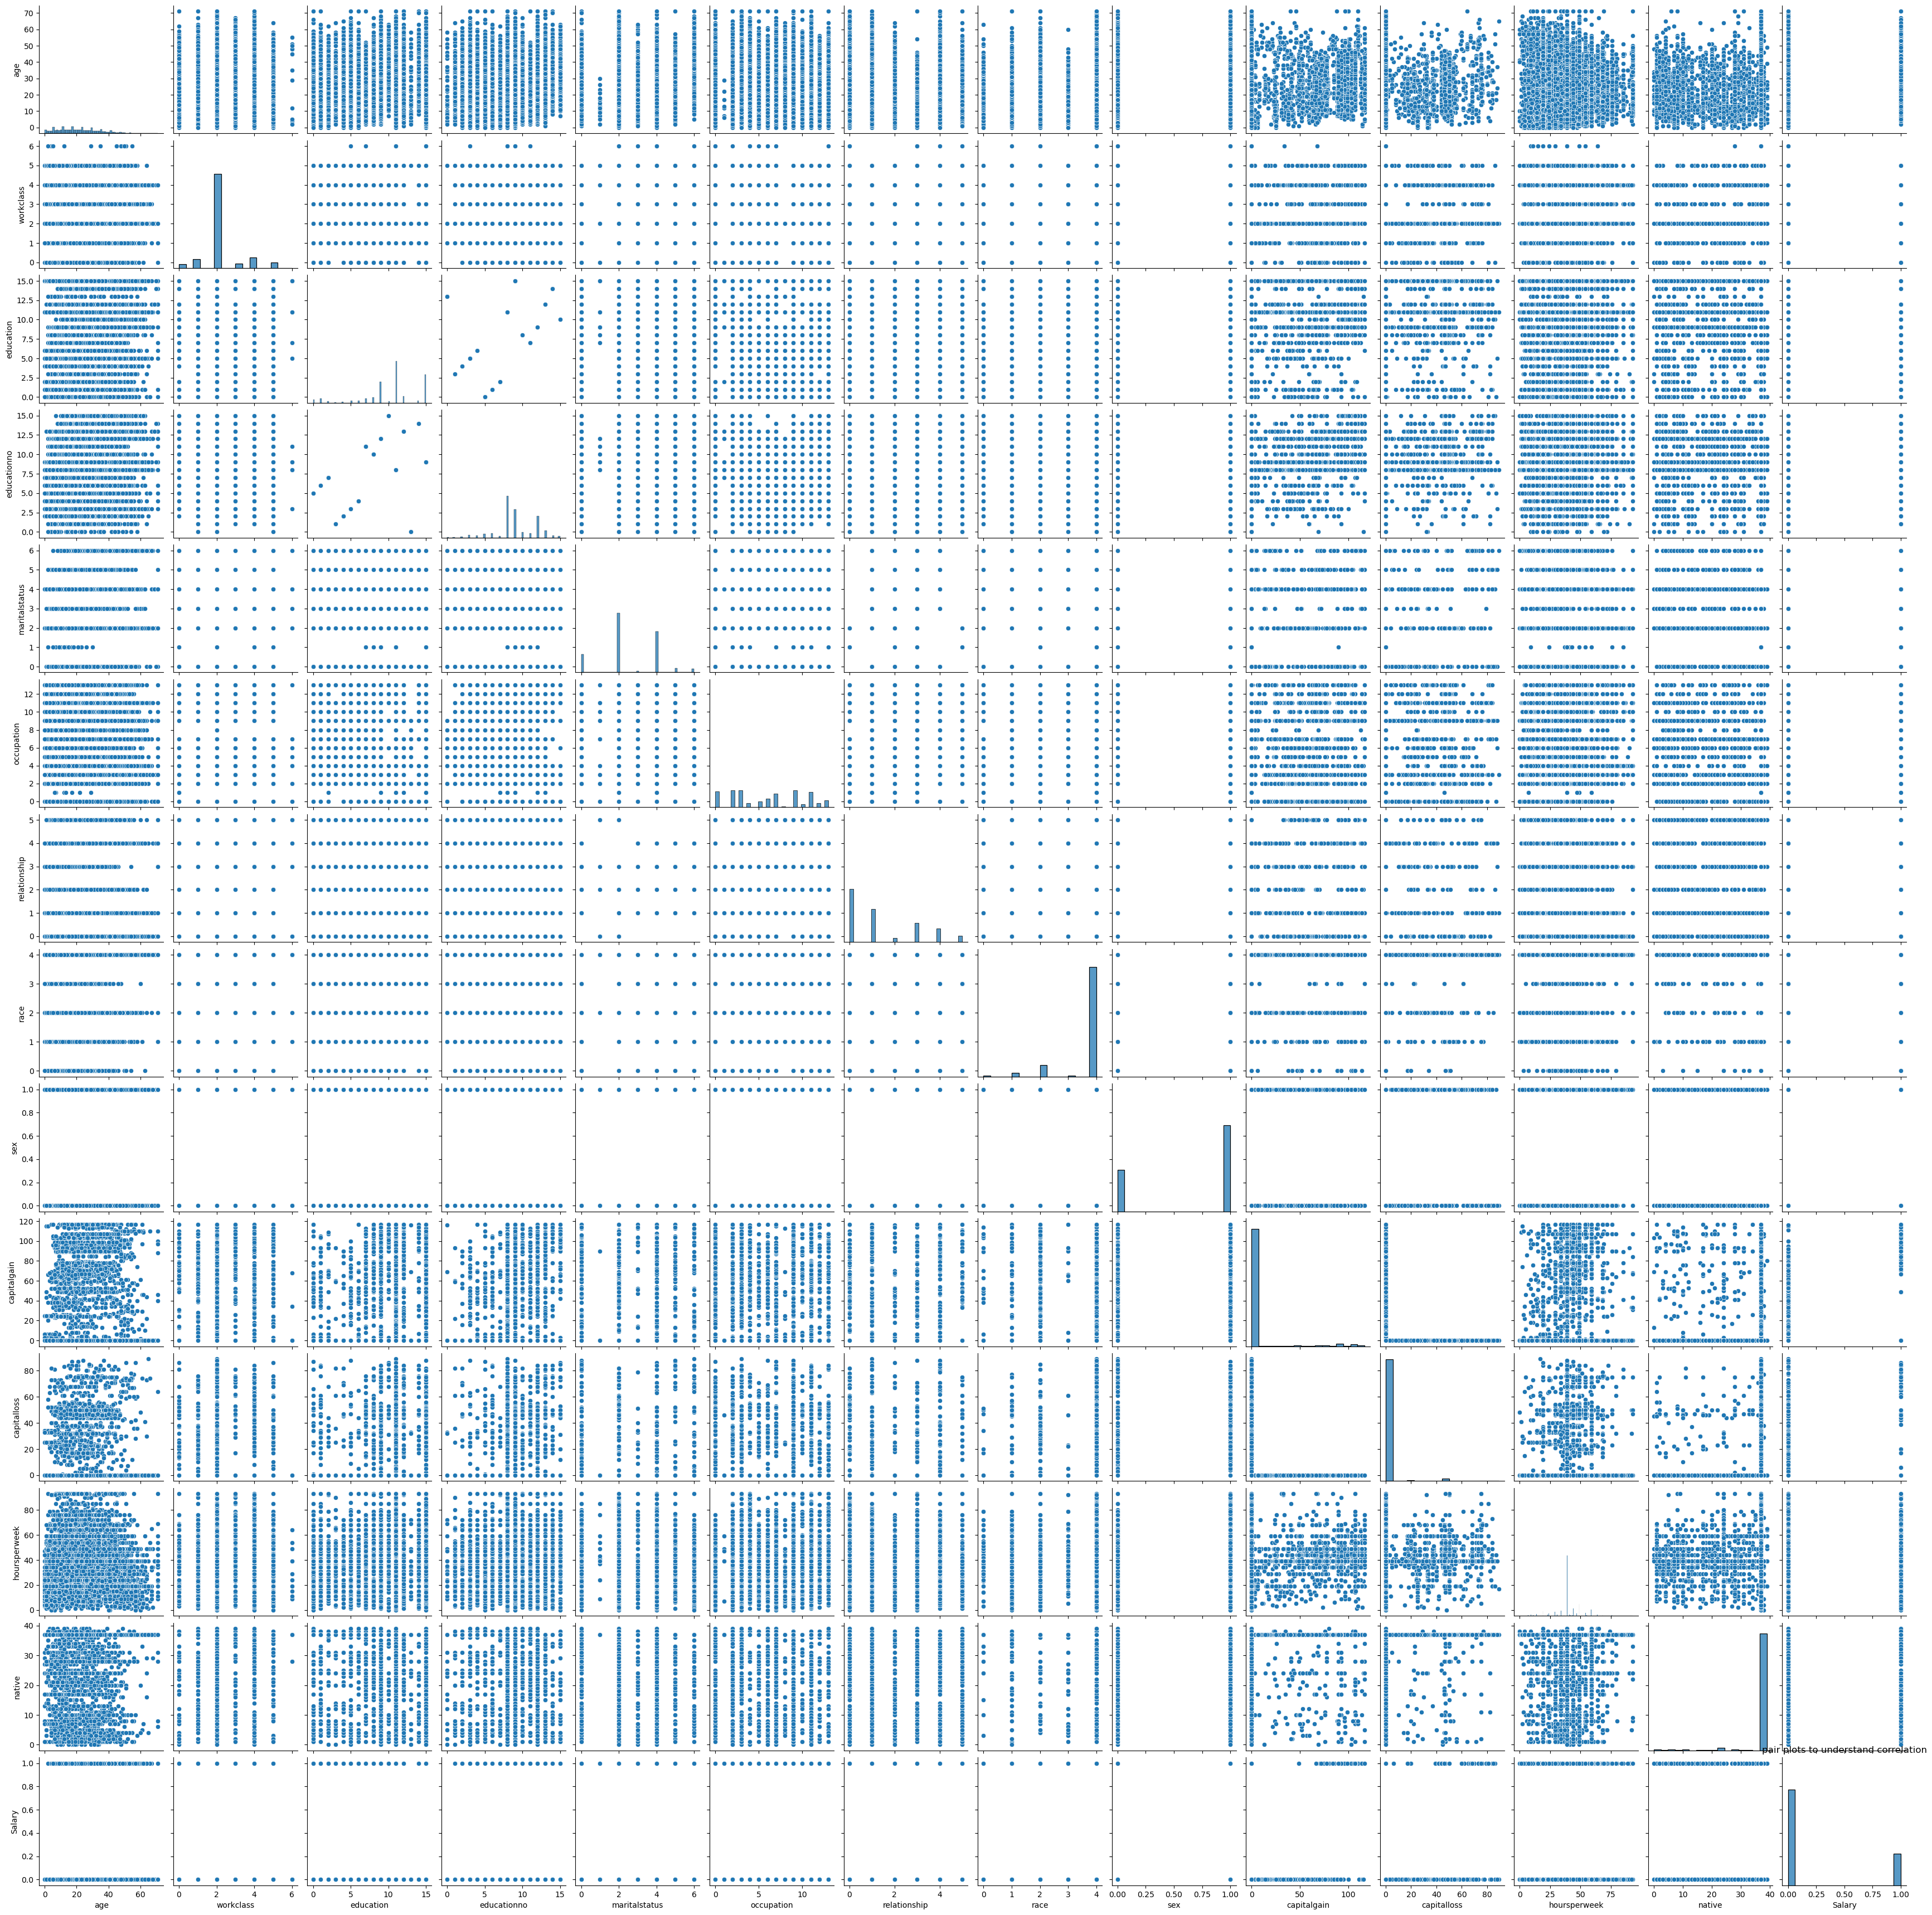

In [140]:
#plotting features
import seaborn as sns
sns.pairplot(train)
plt.title('pair plots to understand correlation')
plt.show()

C:\Users\anura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


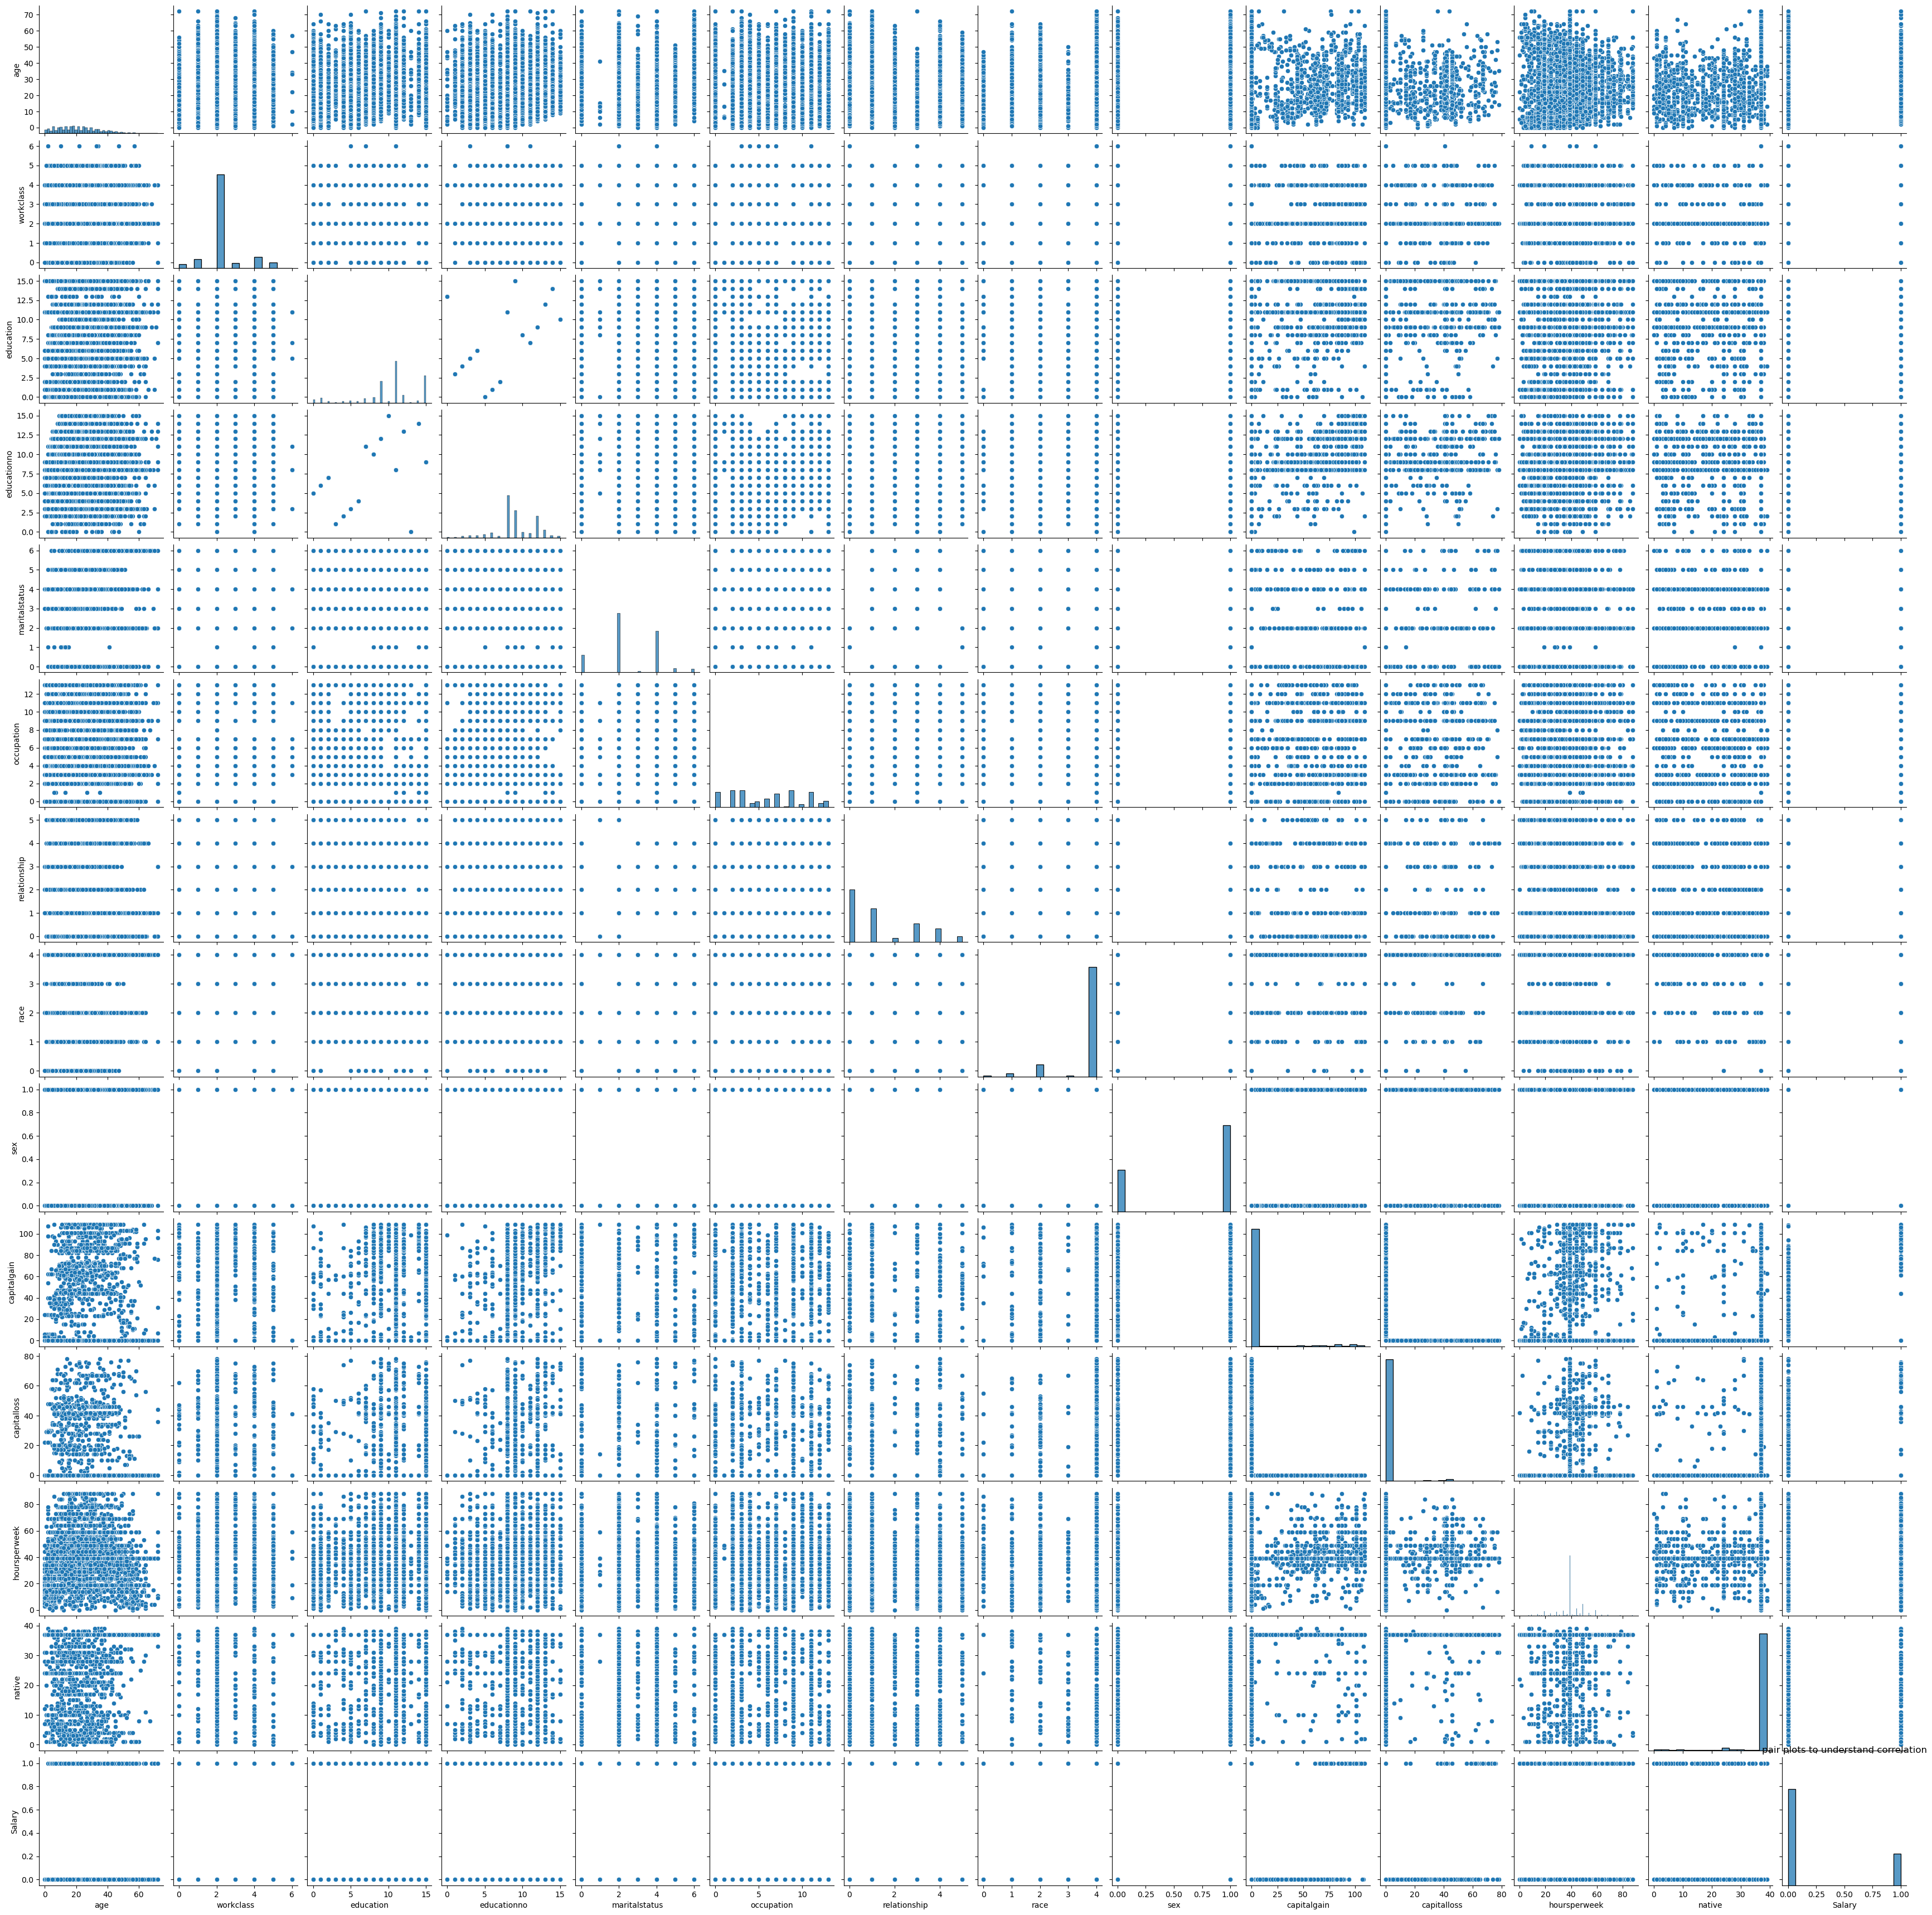

In [141]:
#plotting features
sns.pairplot(test)
plt.title('pair plots to understand correlation')
plt.show()

<Axes: ylabel='count'>

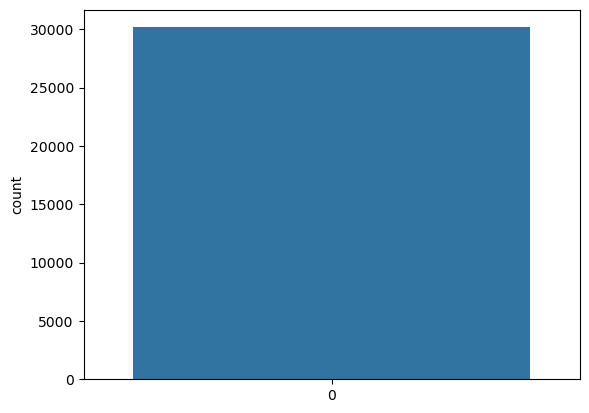

In [142]:
sns.countplot(train['Salary'])

<Axes: ylabel='count'>

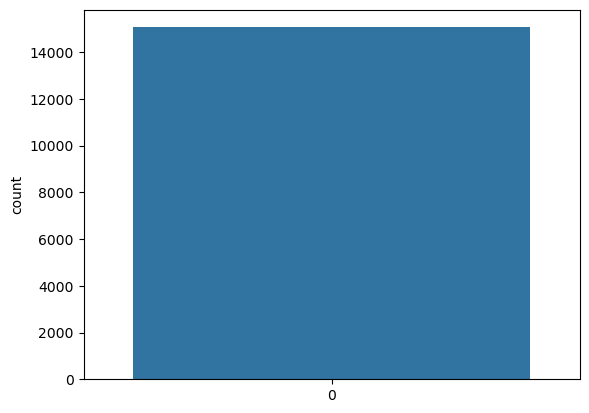

In [143]:
sns.countplot(test['Salary'])

# forest fires data


In [144]:
forestfires = pd.read_csv("forestfires.csv")

In [145]:
forestfires

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [146]:
# Dropping the duplicate row
forestfires=forestfires.drop_duplicates()
forestfires.reset_index(drop=True, inplace=True)
forestfires.head()


month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [147]:
forestfire=forestfires.drop(['month','day'],axis=1)
forestfire

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
504  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
505  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
506  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
507  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
508  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0          small  
1           1         0          small  
2           1         0          small  
3           0         0          small  
4           0         0          small  
..        ...       ...            ...  
504         0         0          large  
505         0         0          large  
506         0         0          large  
507         0         0          small  
508         0         0          small  

[509 rows x 29 columns]

In [148]:
#Converting categorical to Numeric
le = LabelEncoder()
forestfire['size_num'] = le.fit_transform(forestfire['size_category'])
forestfire.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthjan  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
0         0         0         1         0         0         0         0   
1         0         0         0         0         0         1         0   
2         0         0         0         0         0         1         0   
3         0         0         1         0         0         0         0   
4         0         0         1         0         0         0         0   

   size_category  size_num  
0          small         1  
1          small         1  
2          small         1  
3          small         1  
4          small         1  

[5 rows x 30 columns]

In [162]:
forestfire=forestfire.drop(["size_category"],axis=1)

In [163]:
x=forestfire.drop(['size_num'],axis=1)
y=forestfire['size_num']

In [164]:
x

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
504  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
505  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
506  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
507  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
508  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
504         0         0         0         0         0         0         0   
505         0         0         0         0         0         0         0   
506         0         0         0         0         0         0         0   
507         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
504         0         0         0  
505         0         0         0  
506         0         0         0  
507         0         0         0  
508         1         0         0  

[509 rows x 28 columns]

In [165]:
y

0      1
1      1
2      1
3      1
4      1
      ..
504    0
505    0
506    0
507    1
508    1
Name: size_num, Length: 509, dtype: int32

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=517)

In [167]:
#Grid search CV 
clf = SVC()

In [168]:
param_grid =[{'kernal':['rbf'],'gamma':[50.5,10,0.5],'c':[14,13,12,11,10,0,0.01,0.001]}]

In [169]:
gav = GridSearchCV(clf,param_grid,cv=10)

In [170]:
gav.get_params,gav.score

(<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=SVC(),
              param_grid=[{'c': [14, 13, 12, 11, 10, 0, 0.01, 0.001],
                           'gamma': [50.5, 10, 0.5], 'kernal': ['rbf']}])>,
 <bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=SVC(),
              param_grid=[{'c': [14, 13, 12, 11, 10, 0, 0.01, 0.001],
                           'gamma': [50.5, 10, 0.5], 'kernal': ['rbf']}])>)

In [171]:
clf=SVC(C=15,gamma=50)

In [172]:
clf.fit(x_train,y_train)

SVC(C=15, gamma=50)

In [173]:
y_pred= clf.predict(x_test)

In [174]:
acc = accuracy_score(y_test,y_pred)*100
print("Accuracy=",acc)

Accuracy= 73.80952380952381


In [178]:
confusion_matrix(y_test,y_pred)

array([[  0,  44],
       [  0, 124]], dtype=int64)

In [179]:
#plotting features
import seaborn as sns
sns.pairplot(forestfire)
plt.title('pair plots to understand correlation')
plt.show()

C:\Users\anura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: ylabel='count'>

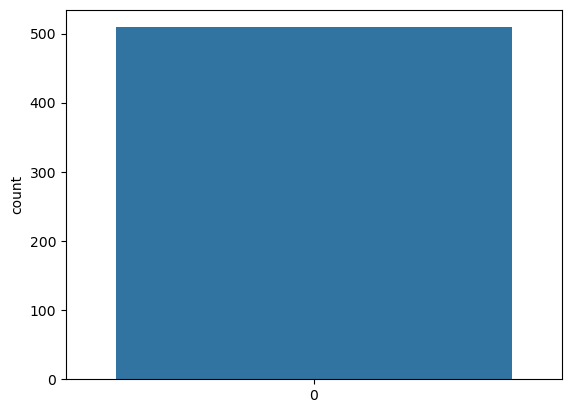

In [180]:
sns.countplot(forestfire['size_num'])